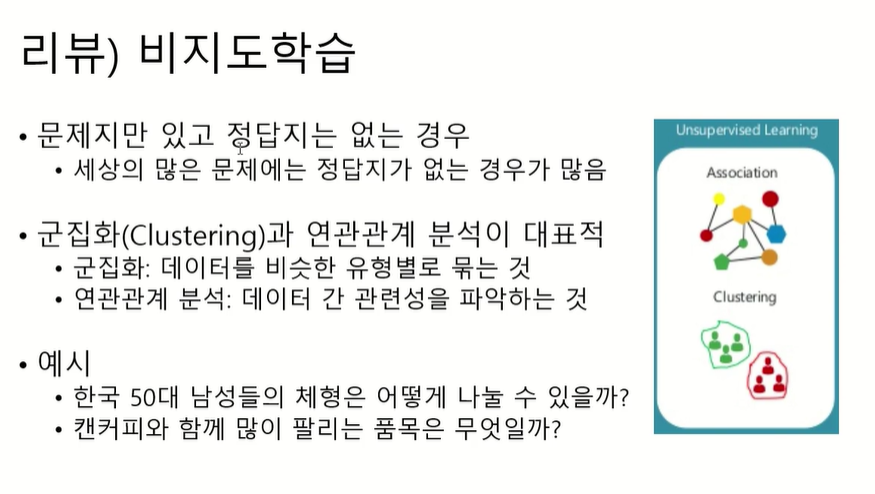

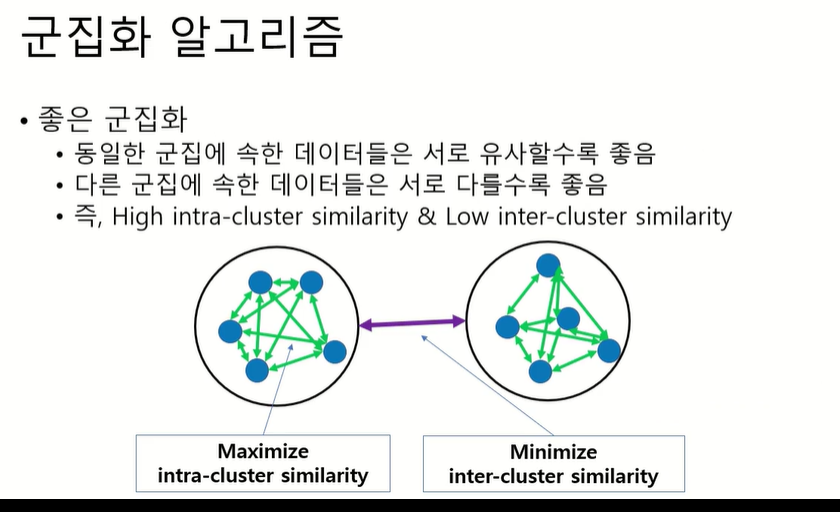

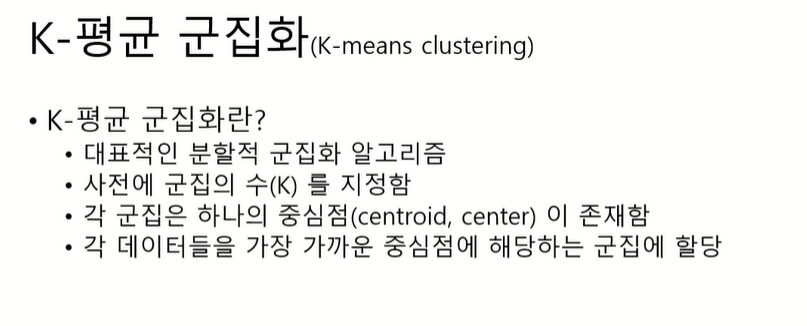

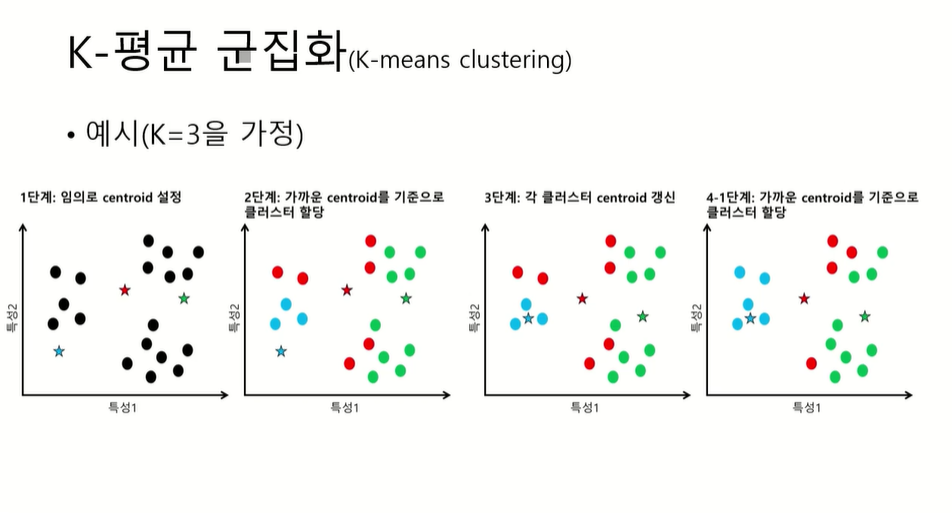

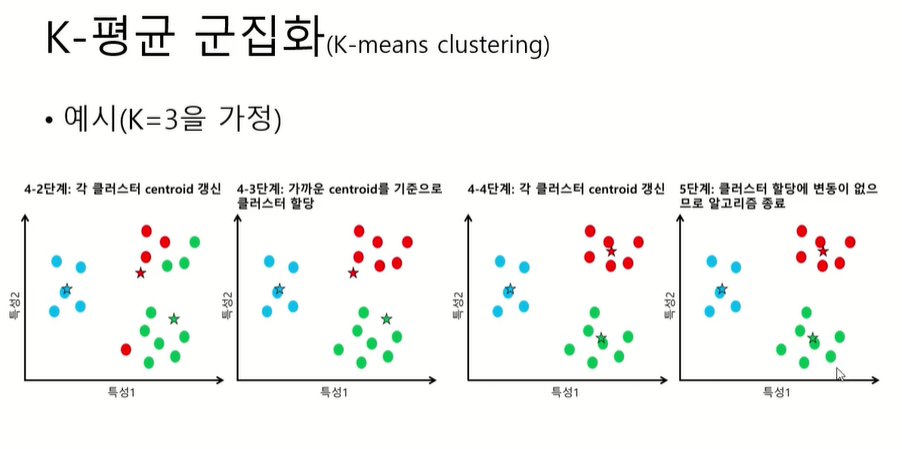

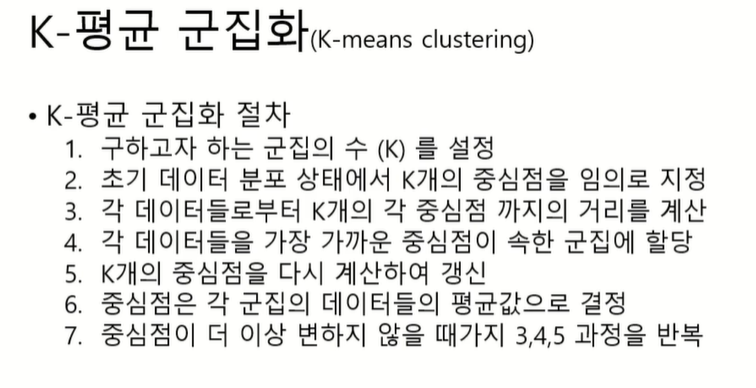

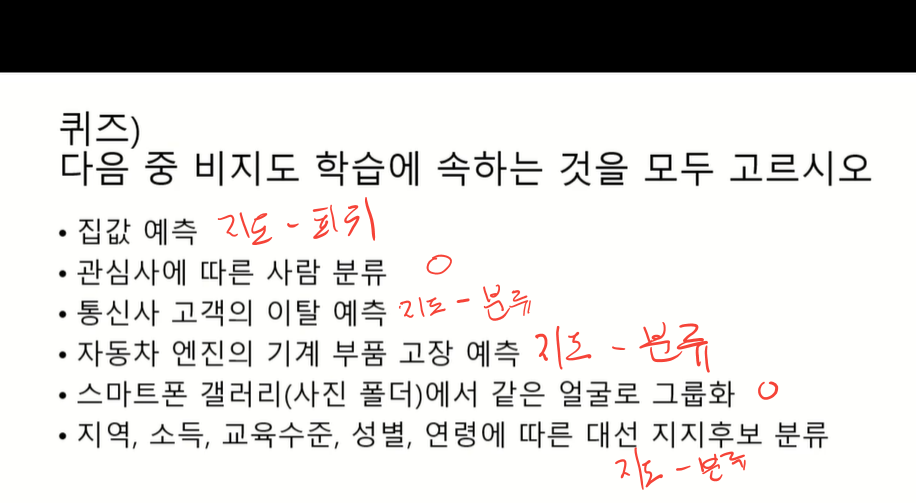

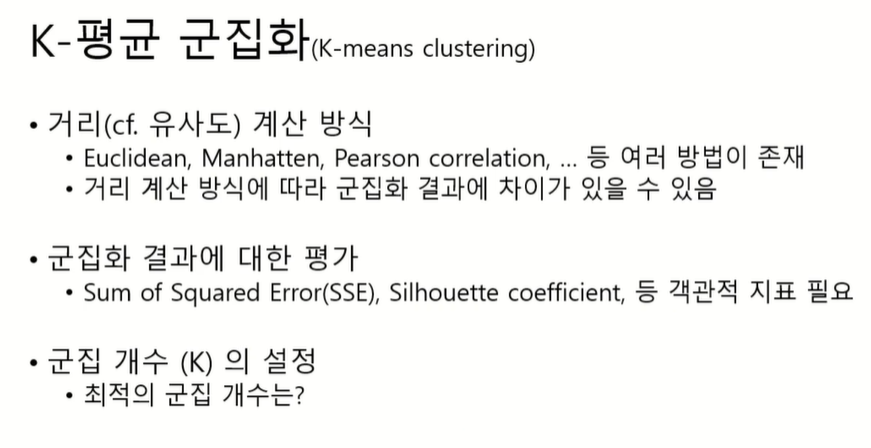

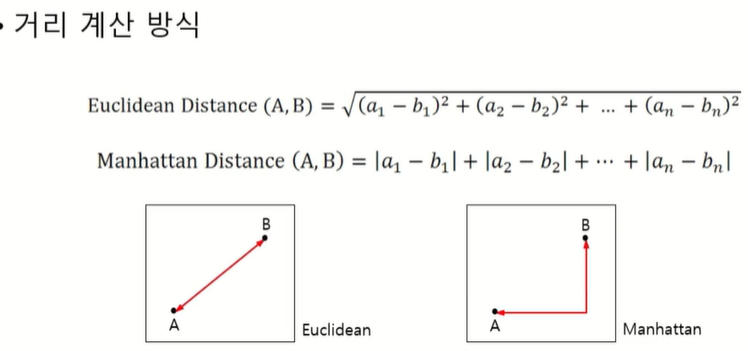

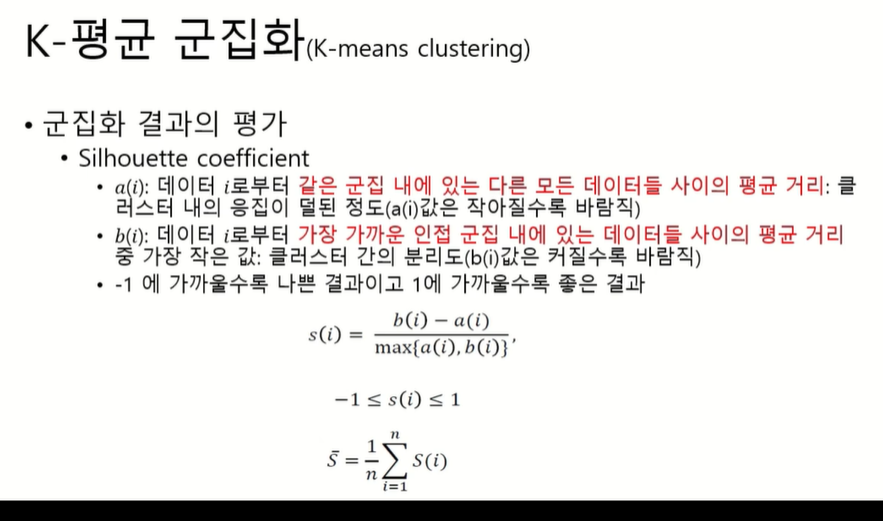

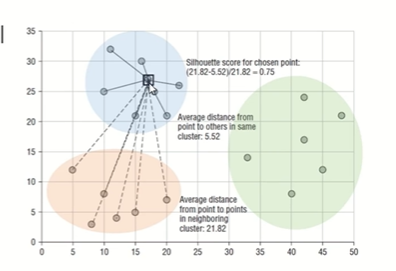

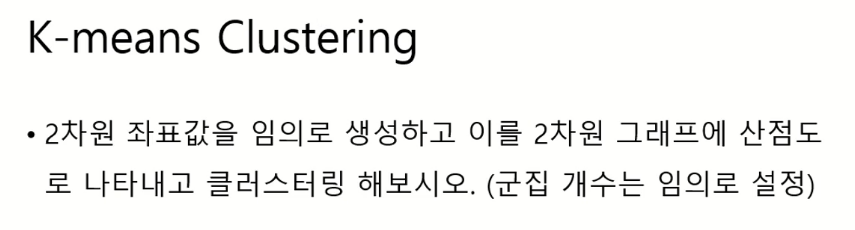

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
df = pd.DataFrame(columns = ('x','y'))

In [73]:
#데이터 준비 : 임의의 2차원 좌표
df.loc[0] = [1,1]
df.loc[1] = [1,0]
df.loc[2] = [2,1]
df.loc[3] = [5,3]
df.loc[4] = [6,7]
df.loc[5] = [6,6]
df.loc[6] = [0,8]
df.loc[7] = [11,2]
df.loc[8] = [12,1]
df.loc[9] = [2,2]
df.loc[10] = [12,3]
df.loc[11] = [7,7]
df.loc[12] = [7,6]
df.loc[13] = [13,4]
df.loc[14] = [13,1]
df.loc[15] = [6,5]
df.loc[16] = [4,5]

In [74]:
df

,x,y
0,1,1
1,1,0
2,2,1
3,5,3
4,6,7
5,6,6
6,0,8
7,11,2
8,12,1
9,2,2


C:\Users\alsgu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(27.550000000000004, 0.5, 'y')

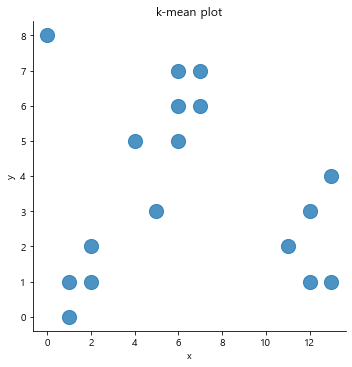

In [76]:
# 산점도 그리기
sns.lmplot('x','y',data = df,fit_reg=False,scatter_kws={'s':200})
#fit_reg = False 회귀직선 없이 산점도만
# scatter_kws = size를 조정

plt.title('k-mean plot')
plt.xlabel('x')
plt.ylabel('y')

## 적절한 클러스터 갯수 구하기 : 엘보우 메소드
- 오차제곱합(SSE)값이 inertia_에 저장되며 이 값을 이용하여 그래프 작성

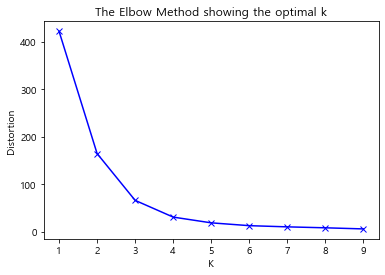

In [40]:
X = df.values # 인덱스를 제외한 값을 ndarray로 추출
inertia_arr = [] # SSE 값을 저장하기 위한 list
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)#모델적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the elbow
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- 기울기가 확 꺽이는 3이 엘보우 포인트

In [41]:
#최적 K 개수로 클러스터링 수행
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [42]:
kmeans.labels_#클러스터 결과 확인

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1])

In [43]:
df['cluster_id'] = kmeans.labels_

In [44]:
df

,x,y,cluster_id
0,1,1,0
1,1,0,0
2,2,1,0
3,5,3,1
4,6,7,1
5,6,6,1
6,0,8,1
7,11,2,2
8,12,1,2
9,2,2,0


C:\Users\alsgu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


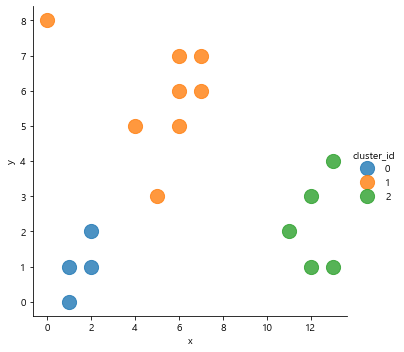

In [45]:
# 클러스터링 시각화
sns.lmplot('x','y', data = df, fit_reg=False, scatter_kws={'s':200}, hue = 'cluster_id')

## Scaling

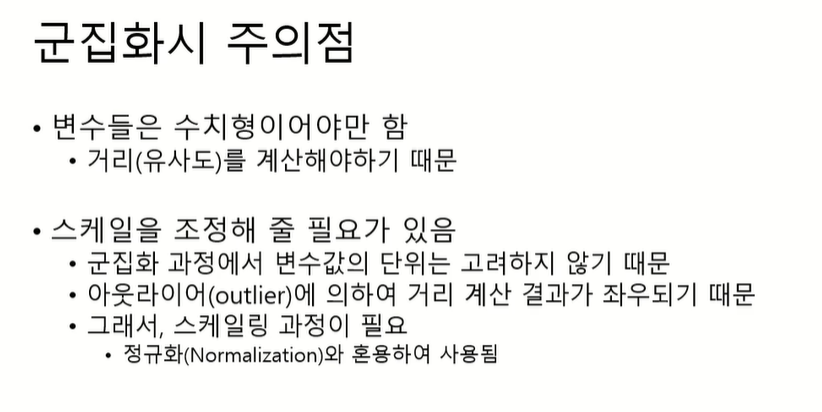

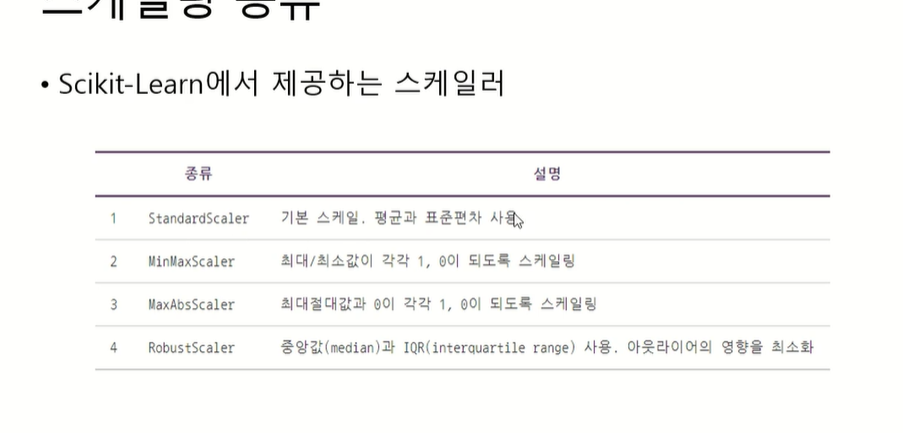

In [46]:
import matplotlib.pyplot as plt

In [47]:
df = pd.DataFrame({'선수' : ['김연경','박태환','박지성','손흥민','차두리',
                           '황희찬','류현진','김민재','이윤열','김병현','기성용'],
                  '연봉':[14,4,48,65,8,5,14,4,1,6,20],
                  '활동기간':[20,8,20,5,11,3,5,2,7,9,13]})


In [48]:
df

,선수,연봉,활동기간
0,김연경,14,20
1,박태환,4,8
2,박지성,48,20
3,손흥민,65,5
4,차두리,8,11
5,황희찬,5,3
6,류현진,14,5
7,김민재,4,2
8,이윤열,1,7
9,김병현,6,9


Text(0, 0.5, 'y')

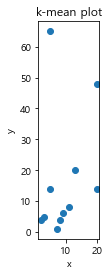

In [49]:
x = df['활동기간']
y = df['연봉']

plt.scatter(x,y)
plt.axis('scaled') # x,y 축 눈금 간격을 동일하게
plt.title('k-mean plot')
plt.xlabel('x')
plt.ylabel('y')

In [50]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df.drop(['선수'], axis = 1))
df_scaled

array([[-0.16222491,  1.80363227],
       [-0.67207461, -0.23123491],
       [ 1.57126409,  1.80363227],
       [ 2.43800859, -0.7399517 ],
       [-0.46813473,  0.27748189],
       [-0.62108964, -1.07909623],
       [-0.16222491, -0.7399517 ],
       [-0.67207461, -1.24866849],
       [-0.82502952, -0.40080717],
       [-0.57010467, -0.06166264],
       [ 0.14368492,  0.61662642]])

- 스케일링은 수치형 변수만 가능

(-1.4012835303104763,
 1.9562473046908628,
 -0.9881814281889821,
 2.6011604948389153)

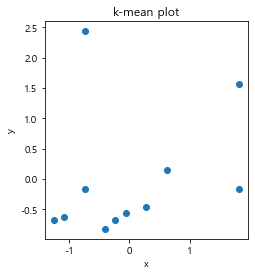

In [51]:
df2 = pd.DataFrame(df_scaled, columns=('연봉','활동기간'))

x = df2['활동기간']
y = df2['연봉']

plt.scatter(x,y)

plt.title('k-mean plot')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled')

## 변수가 여러 개인 데이터 클러스터링

In [52]:
fd = pd.DataFrame({'선수' : ['김연경','박태환','박지성','손흥민','차두리',
                           '황희찬','류현진','김민재','이윤열','김병현','기성용'],
                  '외식':[97,88,5,135,18,81,9,11,0,19,38],
                  '영화관람':[13,6,2,9,0,11,0,8,8,9,9],
                  '공연관람':[14,9,0,15,3,8,6,1,1,3,2],
                  '쇼핑횟수':[20,17,0,11,10,110,7,30,0,2,13]})

In [53]:
fd

,선수,외식,영화관람,공연관람,쇼핑횟수
0,김연경,97,13,14,20
1,박태환,88,6,9,17
2,박지성,5,2,0,0
3,손흥민,135,9,15,11
4,차두리,18,0,3,10
5,황희찬,81,11,8,110
6,류현진,9,0,6,7
7,김민재,11,8,1,30
8,이윤열,0,8,1,0
9,김병현,19,9,3,2


In [54]:
# StandardScaler로 스케일링 수행
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(fd.drop(['선수'], axis = 1))
df_scaled

array([[ 1.16449073,  1.4888528 ,  1.66804677,  0.        ],
       [ 0.96080773, -0.19705405,  0.67084489, -0.10085944],
       [-0.91760224, -1.16042938, -1.12411847, -0.67239626],
       [ 2.02448566,  0.52547746,  1.86748714, -0.30257832],
       [-0.62339345, -1.64211705, -0.52579735, -0.33619813],
       [ 0.80238761,  1.00716513,  0.47140452,  3.02578316],
       [-0.82707646, -1.64211705,  0.07252377, -0.43705757],
       [-0.78181357,  0.28463362, -0.9246781 ,  0.33619813],
       [-1.03075947,  0.28463362, -0.9246781 , -0.67239626],
       [-0.600762  ,  0.52547746, -0.52579735, -0.60515663],
       [-0.17076454,  0.52547746, -0.72523772, -0.23533869]])

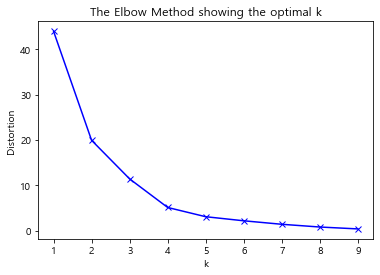

In [55]:
#오차제곱합으로 최적 클러스터 개수 찾기
X = df_scaled
inertia_arr = []#SSE 값을 저장하기 위한 list
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)# 모델 적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the show
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) # 클러스터 설정 - 갯수를 3개로 셋팅

KMeans(n_clusters=3)

In [57]:
kmeans.labels_

array([1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0])

In [58]:
# 원데이터에 클러스터링 결과 추가
fd['cluster_id'] = kmeans.labels_
fd

,선수,외식,영화관람,공연관람,쇼핑횟수,cluster_id
0,김연경,97,13,14,20,1
1,박태환,88,6,9,17,1
2,박지성,5,2,0,0,0
3,손흥민,135,9,15,11,1
4,차두리,18,0,3,10,0
5,황희찬,81,11,8,110,2
6,류현진,9,0,6,7,0
7,김민재,11,8,1,30,0
8,이윤열,0,8,1,0,0
9,김병현,19,9,3,2,0


In [59]:
# cluster_id 오름차순으로 정렬
fd = fd.sort_values(['cluster_id']) # 교수님은 df.sort_values(by = 'cluster_id')

## 차원 축소

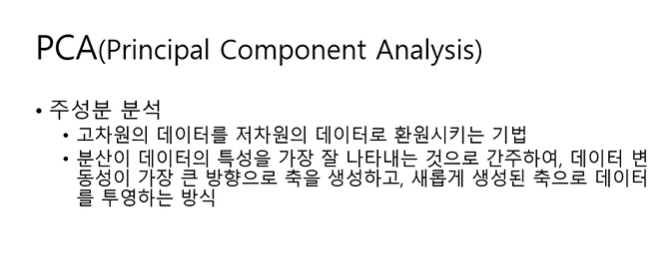

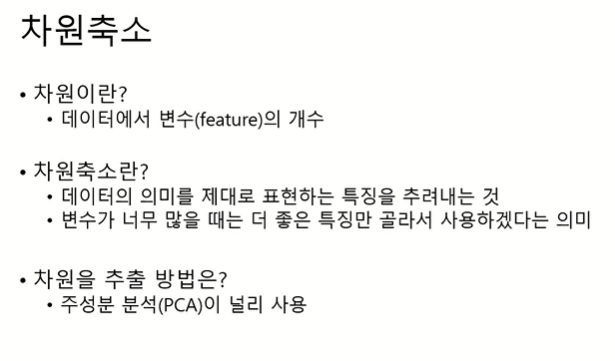

In [60]:
df = pd.read_csv('./data/player.csv')
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster_id'] = kmeans.labels_
df_scaled = StandardScaler().fit_transform(df.drop(['선수'], axis = 1))

In [61]:
df_scaled

array([[ 1.16449073,  1.4888528 ,  1.66804677,  0.        , -1.42302495],
       [ 0.96080773, -0.19705405,  0.67084489, -0.10085944, -1.42302495],
       [-0.91760224, -1.16042938, -1.12411847, -0.67239626,  0.31622777],
       [ 2.02448566,  0.52547746,  1.86748714, -0.30257832, -1.42302495],
       [-0.62339345, -1.64211705, -0.52579735, -0.33619813,  0.31622777],
       [ 0.80238761,  1.00716513,  0.47140452,  3.02578316,  2.05548048],
       [-0.82707646, -1.64211705,  0.07252377, -0.43705757,  0.31622777],
       [-0.78181357,  0.28463362, -0.9246781 ,  0.33619813,  0.31622777],
       [-1.03075947,  0.28463362, -0.9246781 , -0.67239626,  0.31622777],
       [-0.600762  ,  0.52547746, -0.52579735, -0.60515663,  0.31622777],
       [-0.17076454,  0.52547746, -0.72523772, -0.23533869,  0.31622777]])

In [62]:
# 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components= 2) # 차원 갯수 설정(그래프 상에 나타내기 위해 2개로)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print('축소전:',df_scaled.shape)
print('축소후:',df_pca.shape)

축소전: (11, 5)
축소후: (11, 2)


In [63]:
df_pca

array([[ 2.75519692, -0.51708133],
       [ 1.36683687, -1.03768479],
       [-1.88577535, -0.58365942],
       [ 2.93654566, -1.02597077],
       [-1.50339584, -0.52792583],
       [ 0.94358597,  3.74052593],
       [-1.29826793, -0.65101947],
       [-0.93203687,  0.57607444],
       [-1.2567917 , -0.15689001],
       [-0.66530619, -0.05423526],
       [-0.46059155,  0.23786652]])

In [64]:
cols = ['pc1','pc2']
df_pca = pd.DataFrame(data = df_pca, columns=cols)
df_pca

,pc1,pc2
0,2.755197,-0.517081
1,1.366837,-1.037685
2,-1.885775,-0.583659
3,2.936546,-1.025971
4,-1.503396,-0.527926
5,0.943586,3.740526
6,-1.298268,-0.651019
7,-0.932037,0.576074
8,-1.256792,-0.156890
9,-0.665306,-0.054235


In [65]:
#선수 칼럼과 클러스터 번호 칼럼 추가
df_pca['name'] = df.선수
df_pca['target'] = df.cluster_id

In [66]:
df_pca

,pc1,pc2,name,target
0,2.755197,-0.517081,김연경,0
1,1.366837,-1.037685,박태환,0
2,-1.885775,-0.583659,박지성,1
3,2.936546,-1.025971,손흥민,0
4,-1.503396,-0.527926,차두리,1
5,0.943586,3.740526,황희찬,2
6,-1.298268,-0.651019,류현진,1
7,-0.932037,0.576074,김민재,1
8,-1.256792,-0.156890,이윤열,1
9,-0.665306,-0.054235,김병현,1


## 시각화

Text(0, 0.5, 'pc2')

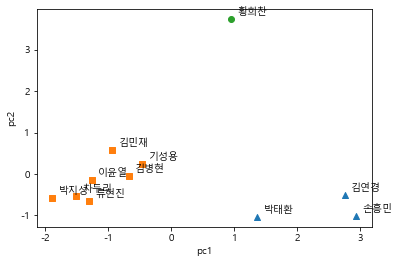

In [67]:
# 세가지 종류의 marker로 그래프 상에 좌표 표시
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca['target']== i]['pc1']
    y_val = df_pca[df_pca['target']== i]['pc2']
    plt.scatter(x_val, y_val, marker = marker)
#한글 폰트 가져오기
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
# 선수이름표시
for i in range(11):
    plt.text(df_pca['pc1'][i]+0.1,df_pca['pc2'][i]+0.1,df_pca['name'][i])
plt.xlabel('pc1')
plt.ylabel('pc2')